In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data_pd=pd.read_csv('/Users/jamie/Personal/Coding/archive/mnist_train.csv')

In [3]:
data_np=np.array(data_pd).T
m,n =data_np.shape
y_data = data_np[0]
x_data= data_np[1:n]

input_lyr= 784
hid_lyr_1 = 256
hid_lyr_2 = 128
output_lyr=10

In [4]:
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0)
    return np.exp(Z_shifted) / np.sum(np.exp(Z_shifted), axis=0)


def forward_propagation(x, w1, b1, w2, b2, w3, b3):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = relu(z2)
    z3= np.dot(w3, a2) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

def initial_params(input_lyr, hid_lyr_1, hid_lyr_2, output_lyr):
    b1 = np.full((hid_lyr_1, 1), 0.01)
    w1 = np.random.randn(hid_lyr_1, input_lyr) * np.sqrt(2. / input_lyr)
    b2 = np.full((hid_lyr_2, 1), 0.01)
    w2 = np.random.randn(hid_lyr_2, hid_lyr_1) * np.sqrt(2. / hid_lyr_1)
    b3 = np.full((output_lyr, 1), 0.01)
    w3 = np.random.randn(output_lyr, hid_lyr_2) * np.sqrt(2. / hid_lyr_1)
    return w1, b1, w2, b2, w3, b3

def one_hot(Y):
    one_hot_y=np.zeros((Y.size, Y.max()+1))
    one_hot_y[np.arange(Y.size), Y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y
    
def derivative_relu(Z):
    return Z > 0
    
def backwards_propagation(y, z1, a1, z2, a2, x, w2, z3, a3, w3):
    one_hot_y= one_hot(y)
    m = y.size
    dz3 = a3 - one_hot_y
    dw3 = 1/m*np.dot(dz3,a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)/m
    dz2 = np.dot(w3.T, dz3)*derivative_relu(z2)
    dw2 = 1/m* np.dot(dz2,a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True) / m
    dz1 = np.dot(w2.T, dz2)*derivative_relu(z1)
    dw1 = 1/m * np.dot(dz1,x.T)
    db1 = np.sum(dz1, axis=1, keepdims=True) / m
    return dw1, db1, dw2, db2, dw3, db3

def update_parameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    w3 = w3 - alpha * dw3
    b3 = b3 - alpha * db3
    return w1, b1, w2, b2, w3, b3

def compute_accuracy(y_true, y_pred):
    """
    Computes the accuracy of the predictions.

    Parameters:
    y_true (numpy.ndarray): The true labels (not one-hot encoded).
    y_pred (numpy.ndarray): The predictions, as probabilities (output of softmax).

    Returns:
    float: The accuracy.
    """
    # Get predicted labels from y_pred
    predictions = np.argmax(y_pred, axis=0)
    correct_predictions = predictions == y_true
    accuracy = np.mean(correct_predictions)
    return accuracy


    

In [8]:
def gradient_descent(x, y, iterations, alpha, input_lyr, hid_lyr_1, hid_lyr_2, output_lyr):
    w1, b1, w2, b2, w3, b3 = initial_params(input_lyr, hid_lyr_1, hid_lyr_2, output_lyr) # Ensure this function is defined and returns the initial parameters
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_propagation(x, w1, b1, w2, b2, w3, b3)
        dw1, db1, dw2, db2, dw3, db3 = backwards_propagation(y, z1, a1, z2, a2, x, w2, z3, a3, w3)
        w1, b1, w2, b2, w3, b3 = update_parameters(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        if i % 10 == 0:  # Optionally, print the accuracy every 100 iterations
            accuracy = compute_accuracy(y, a3)
            print(f"Iteration {i}: Accuracy = {accuracy}")


    return w1, b1, w2, b2, w3, b3

In [9]:
w1, b1, w2, b2, w3, b3 = gradient_descent(x_data, y_data, 1000, 0.0005, input_lyr, hid_lyr_1, hid_lyr_2, output_lyr)

Iteration 0: Accuracy = 0.04935
Iteration 10: Accuracy = 0.5900333333333333
Iteration 20: Accuracy = 0.6942666666666667
Iteration 30: Accuracy = 0.7418833333333333
Iteration 40: Accuracy = 0.76905
Iteration 50: Accuracy = 0.7871833333333333
Iteration 60: Accuracy = 0.8025833333333333
Iteration 70: Accuracy = 0.8136833333333333
Iteration 80: Accuracy = 0.8222333333333334
Iteration 90: Accuracy = 0.8288333333333333
Iteration 100: Accuracy = 0.8347
Iteration 110: Accuracy = 0.8401666666666666
Iteration 120: Accuracy = 0.84465
Iteration 130: Accuracy = 0.8487833333333333
Iteration 140: Accuracy = 0.8525166666666667
Iteration 150: Accuracy = 0.8558166666666667
Iteration 160: Accuracy = 0.8584833333333334
Iteration 170: Accuracy = 0.8611833333333333
Iteration 180: Accuracy = 0.8638833333333333
Iteration 190: Accuracy = 0.8662
Iteration 200: Accuracy = 0.8682
Iteration 210: Accuracy = 0.8703666666666666
Iteration 220: Accuracy = 0.8727
Iteration 230: Accuracy = 0.8748333333333334
Iteration 24

In [12]:
test_data_pd=pd.read_csv('/Users/jamie/Personal/Coding/archive/mnist_test.csv')
test_data_np=np.array(test_data_pd).T
t,u = test_data_np.shape
y_test = test_data_np[0]
x_test= test_data_np[1:u]
z_test, a1_test, z2_test, a2_test, z3_test, a3_test = forward_propagation(x_test, w1, b1, w2, b2, w3, b3)
test_accuracy = compute_accuracy(y_test, a3_test)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.909


In [13]:
def display_image_with_prediction(index, x_test, y_test, w1, b1, w2, b2, w3, b3):
    """
    Display an image from the test set and the model's prediction.

    Parameters:
    - index: Index of the image in the test dataset.
    - x_test: Test images.
    - y_test: True labels for the test images.
    - w1, b1, w2, b2, w3, b3: Parameters of the trained model.
    """
    # Reshape the image to 28x28 for display
    image = x_test[:, index].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Do not show axes to keep it clean
    plt.show()
    
    # Predict the label for the selected image
    # Note: x_test[:, index:index+1] is used to keep the dimension
    _, _, _, _, _, a3 = forward_propagation(x_test[:, index:index+1], w1, b1, w2, b2, w3, b3)
    predicted_label = np.argmax(a3, axis=0)
    
    print(f"True Label: {y_test[index]}")
    print(f"Predicted Label: {predicted_label[0]}")


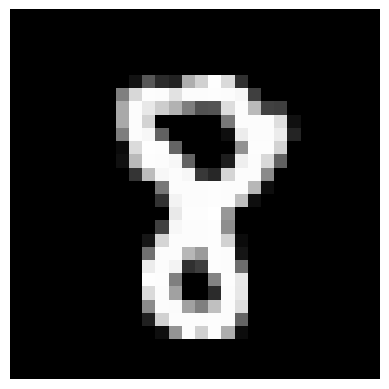

True Label: 8
Predicted Label: 8


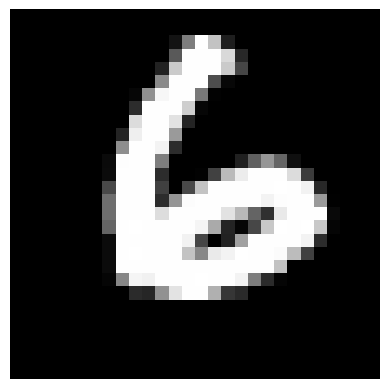

True Label: 6
Predicted Label: 6


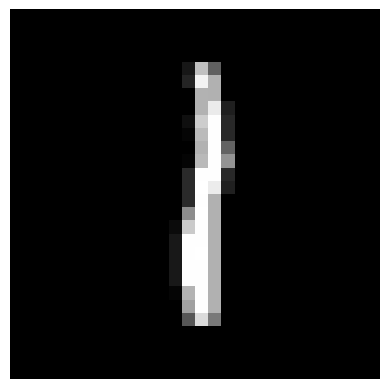

True Label: 1
Predicted Label: 1


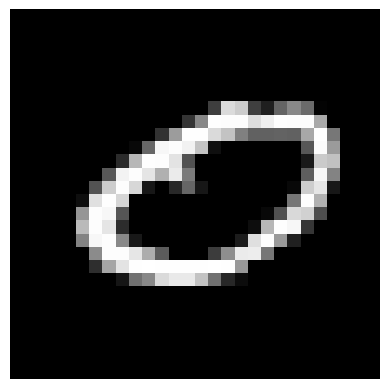

True Label: 0
Predicted Label: 0


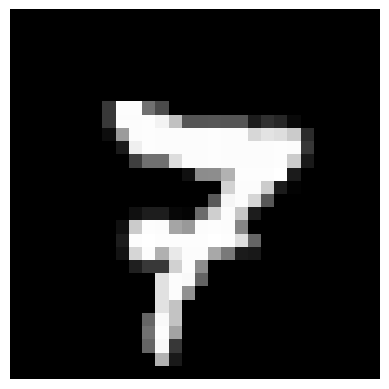

True Label: 7
Predicted Label: 7


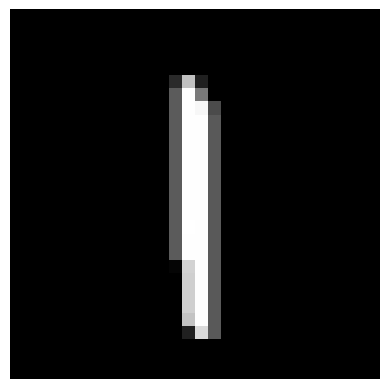

True Label: 1
Predicted Label: 1


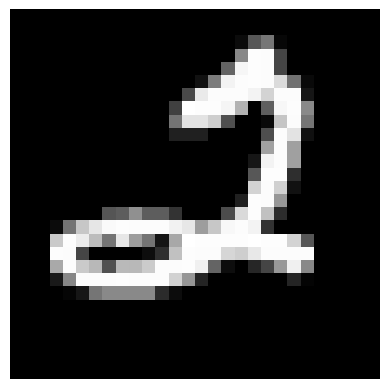

True Label: 2
Predicted Label: 2


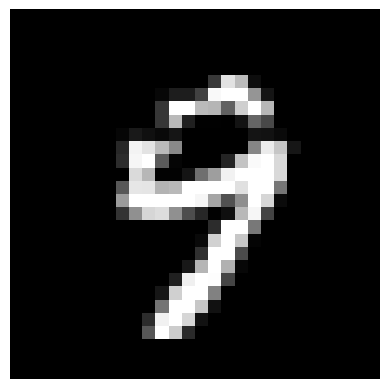

True Label: 9
Predicted Label: 9


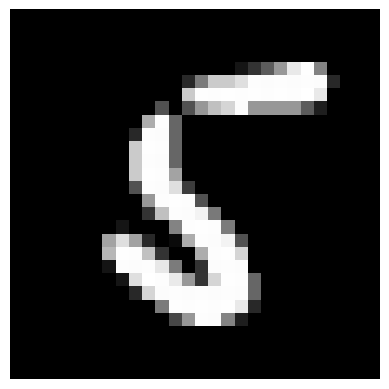

True Label: 5
Predicted Label: 5


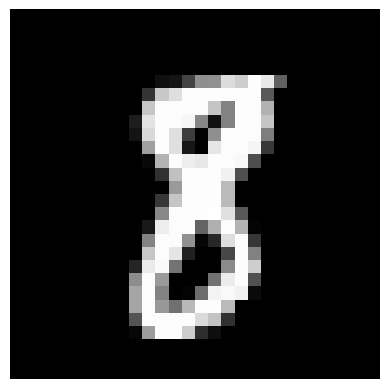

True Label: 8
Predicted Label: 8
Now 10 incorrect


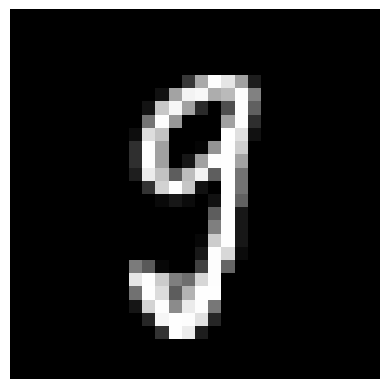

True Label: 9
Predicted Label: 0


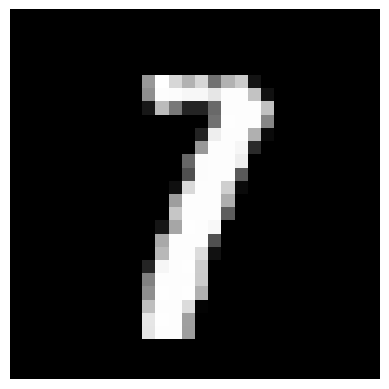

True Label: 7
Predicted Label: 1


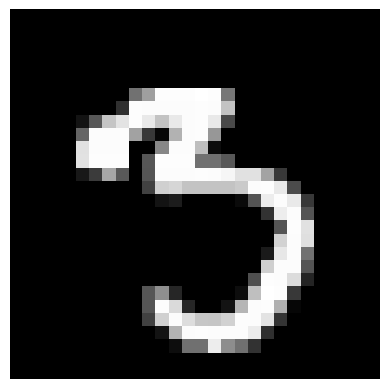

True Label: 3
Predicted Label: 5


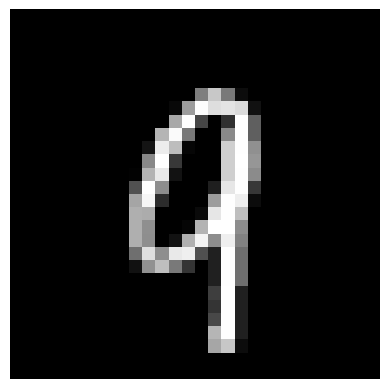

True Label: 9
Predicted Label: 4


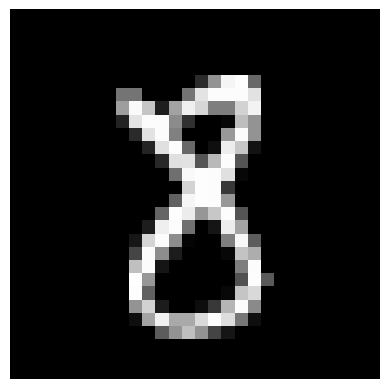

True Label: 8
Predicted Label: 3


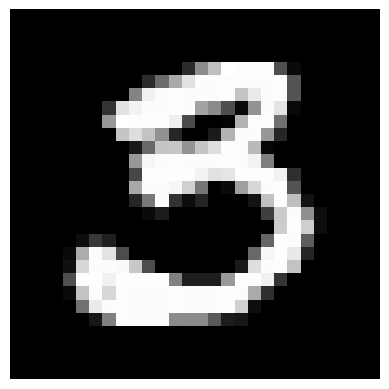

True Label: 3
Predicted Label: 5


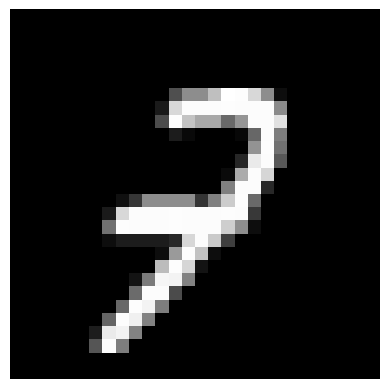

True Label: 7
Predicted Label: 9


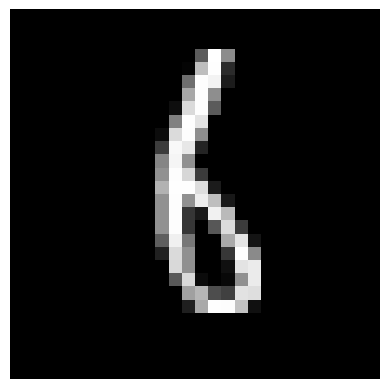

True Label: 6
Predicted Label: 8


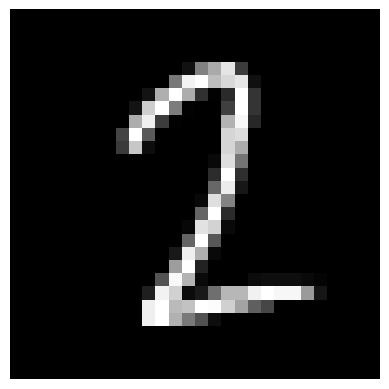

True Label: 2
Predicted Label: 1


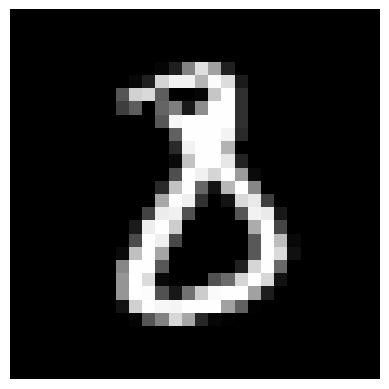

True Label: 8
Predicted Label: 3


In [14]:
def incorrect_predictions_indices(y_test, a3_test):
    predictions = np.argmax(a3_test, axis=0) 
    incorrect_indices = np.where(y_test != predictions)[0]
    return incorrect_indices

def correct_predictions_indices(y_test, a3_test):
    predictions = np.argmax(a3_test, axis = 0)
    correct_indices = np.where(y_test == predictions)[0]
    return correct_indices

def display_multiple_images(random_subset, x_test, y_test, w1, b1, w2, b2, w3, b3):
    for i in random_subset:
        display_image_with_prediction(i, x_test, y_test, w1, b1, w2, b2, w3, b3)

    
correct_indices = correct_predictions_indices(y_test, a3_test)
random_subset_2 = np.random.choice(correct_indices, size=10, replace=False)
display_multiple_images(random_subset_2, x_test, y_test, w1, b1, w2, b2, w3, b3)

print("Now 10 incorrect")
incorrect_indices = incorrect_predictions_indices(y_test, a3_test)
random_subset = np.random.choice(incorrect_indices, size=10, replace=False)
display_multiple_images(random_subset, x_test, y_test, w1, b1, w2, b2, w3, b3)